<a href="https://colab.research.google.com/github/aircable/xor-neural-network-demo/blob/main/xor-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR Problem: Traditional vs. Neural Network Solutions
## Introduction
This notebook demonstrates solving the XOR problem using two approaches:
1. A traditional algorithmic approach
2. A neural network implementation

We aim to highlight the differences in methodology and the opportunities neural networks provide.

### Importing Libraries

This section implements **importing libraries**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

### Create a graphic to illustrate the XOR gate

This section implements **create a graphic to illustrate the xor gate**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [2]:
# Create a graphic to illustrate the XOR gate
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

### Visualize XOR gate logic

This section implements **visualize xor gate logic**. Here we describe how it contributes to the goal of the XOR AI demonstration.

![XOR Gate IEC](https://github.com/aircable/xor-neural-network-demo/blob/main/XOR_IEC.svg?raw=1)


### XOR Gate Truth Table

| A | B | X (A ⊕ B) |
|---|---|-----------|
| 0 | 0 |     0     |
| 0 | 1 |     1     |
| 1 | 0 |     1     |
| 1 | 1 |     0     |


---
## Traditional Algorithmic Example

This section implements **traditional algorithmic example**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [3]:
## Traditional Algorithmic Example
# Define a traditional algorithm for solving XOR
print("Algorithmic Solution for XOR")
def xor_algorithm(x, y):
    return x ^ y  # XOR operation

Algorithmic Solution for XOR


In [4]:
for pair in xor_inputs:
    print(f"Inputs: {pair[0]}, {pair[1]} -> Output: {xor_algorithm(pair[0], pair[1])}")

Inputs: 0, 0 -> Output: 0
Inputs: 0, 1 -> Output: 1
Inputs: 1, 0 -> Output: 1
Inputs: 1, 1 -> Output: 0


---
## Machine Learning Approach: Neural Network

We implements **machine learning approach: neural network** and describe how it contributes to the goal of the XOR AI demonstration.

In [5]:
## Machine Learning Approach: Neural Network
print("\nNeural Network Implementation")


Neural Network Implementation


### Define the Neural Network Class

This section implements **define the neural network class**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [6]:
# Define the Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, input_data):
        # Forward pass calculations
        input_data = np.array(input_data)
        hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)
        return hidden_input, hidden_output, final_input, final_output

    def train(self, input_data, target):
        # Forward pass
        input_data = np.array(input_data)
        target = np.array(target)
        hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)

        # Error calculatio# Initialize and Train the Neural Network
        error = target - final_output

        # Backward pass
        output_gradient = error * self.sigmoid_derivative(final_output)
        hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
        hidden_gradient = hidden_error * self.sigmoid_derivative(hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.learning_rate * np.dot(hidden_output.reshape(-1, 1), output_gradient.reshape(1, -1))
        self.bias_output += self.learning_rate * output_gradient
        self.weights_input_hidden += self.learning_rate * np.dot(input_data.reshape(-1, 1), hidden_gradient.reshape(1, -1))
        self.bias_hidden += self.learning_rate * hidden_gradient

    def predict(self, input_data):
        # Forward pass
        input_data = np.array(input_data)
        hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)
        return final_output

### XOR Training Data

This section implements **xor training data**. We use this to train the neural network.

XOR is a simple problem. Thus you see the input data and the expected output data, fully defined. Other more complex problems can take as input picture data (XY matrix) or sound data (wave form data), etc.

In [7]:
# XOR Training Data
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 1, 1, 0]

### Understanding Neural Network Design for the XOR Problem

When constructing a neural network, selecting the layout of neurons—known as the network architecture—is crucial. The XOR problem is a classic example in machine learning, demonstrating the need for non-linear separability. Here’s how to think about designing the network:

1. **Input Layer**: The input layer has two neurons because the XOR problem has two input variables.

2. **Hidden Layer**: The hidden layer introduces non-linearity to the network. In the case of XOR, a single hidden layer with two neurons suffices. Each neuron learns a different part of the decision boundary, enabling the network to separate the classes effectively.

3. **Output Layer**: The output layer has one neuron for binary classification. The activation function (e.g., sigmoid) maps the output to a probability between 0 and 1.

### Key Principles for Neural Network Design
- **Problem Complexity**: Start with a simple architecture. Increase complexity only if the network fails to learn.
- **Non-linearity**: Use hidden layers with activation functions (e.g., ReLU, sigmoid) to handle problems where data points cannot be separated by a straight line.
- **Overfitting**: Avoid excessive neurons or layers, as this may cause overfitting—where the model performs well on training data but poorly on unseen data.
- **Iterative Tuning**: Experiment with different configurations, using validation data to assess performance.

This layout for the XOR problem is both minimal and effective, making it ideal for demonstrating the power of neural networks in solving non-linear problems.

### Applying Key Principles to the XOR Problem

#### 1. Problem Complexity
The XOR problem is relatively simple, involving just two input variables and one binary output. However, it is non-linearly separable, meaning it cannot be solved by a simple perceptron or linear classifier. To address this:
- A minimal architecture was chosen with one hidden layer containing **two neurons**. This provides sufficient complexity to map the XOR problem's input space to the desired output space.

#### 2. Non-Linearity
The XOR problem requires non-linearity to separate the inputs effectively. To achieve this:
- A **hidden layer with activation functions** (e.g., sigmoid or ReLU) was used. The activation functions enable the network to combine and transform the input data into non-linear patterns that can represent the XOR relationship.

#### 3. Overfitting
Since the XOR problem has only four possible input combinations, the risk of overfitting is high if the network is overly complex. To prevent overfitting:
- The architecture was kept minimal with only **two neurons in the hidden layer** and one output neuron.
- Regularization techniques are unnecessary here due to the simplicity of the problem.

#### 4. Iterative Tuning
The network design was iteratively tuned to find the smallest and most efficient configuration that could solve the XOR problem:
- **Two neurons in the hidden layer** were tested and confirmed sufficient to correctly classify all input combinations.
- Larger configurations (e.g., more neurons or layers) were avoided as they added unnecessary complexity without improving performance.

This design balances simplicity and effectiveness, making it an excellent example to demonstrate the principles of neural network design and the power of non-linear decision boundaries.

---

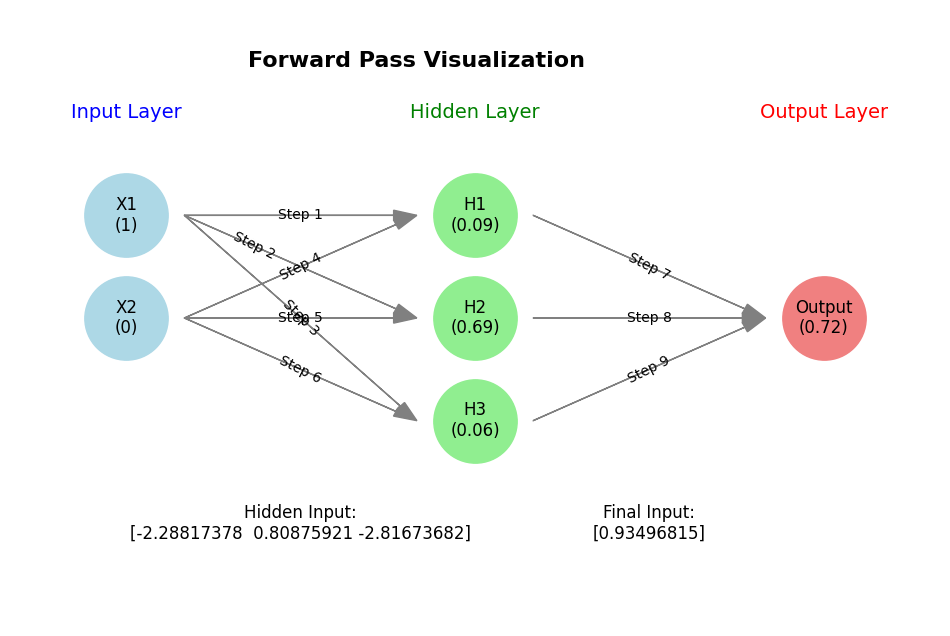

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a neural network instance
input_size = 2
hidden_size = 3
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Define input data (example for XOR)
input_data = np.array([1, 0])

# Perform forward pass
hidden_input, hidden_output, final_input, final_output = nn.forward_pass(input_data)

# Visualization
plt.figure(figsize=(12, 8))

# Main Header
plt.text(2.5, 3.5, "Forward Pass Visualization", fontsize=16, ha="center", va="center", color="black", weight="bold")

# Subheaders
plt.text(0, 3, "Input Layer", fontsize=14, ha="center", va="center", color="blue")
plt.text(3, 3, "Hidden Layer", fontsize=14, ha="center", va="center", color="green")
plt.text(6, 3, "Output Layer", fontsize=14, ha="center", va="center", color="red")

# Input Layer (aligned with hidden layer)
for i in range(input_size):
    plt.plot(0, 2 - i, 'o', markersize=60, color="lightblue")  # Adjusted y-position to align with hidden layer
    plt.text(0, 2 - i, f"X{i+1}\n({input_data[i]})", ha="center", va="center", fontsize=12)

# Hidden Layer
for i in range(hidden_size):
    plt.plot(3, 2 - i, 'o', markersize=60, color="lightgreen")
    plt.text(3, 2 - i, f"H{i+1}\n({hidden_output[i]:.2f})", ha="center", va="center", fontsize=12)

# Output Layer
plt.plot(6, 1, 'o', markersize=60, color="lightcoral")
plt.text(6, 1, f"Output\n({final_output[0]:.2f})", ha="center", va="center", fontsize=12)

# Arrows for data flow with step numbers
step = 1
for i in range(input_size):
    for j in range(hidden_size):
        # Calculate arrow start and end points
        x_start, y_start = 0.5, 2 - i  # Adjusted y-position to align with hidden layer
        x_end, y_end = 2.5, 2 - j
        dx, dy = x_end - x_start, y_end - y_start

        # Draw arrow
        plt.arrow(x_start, y_start, dx, dy, head_width=0.1, head_length=0.2, fc='gray', ec='gray', length_includes_head=True)

        # Calculate angle for text rotation
        angle = np.degrees(np.arctan2(dy, dx))

        # Place text closer to the beginning of the arrow (adjust position for Step 2)
        if step == 2:
            label_x, label_y = x_start + 0.3 * dx, y_start + 0.3 * dy  # Move closer to the start
        else:
            label_x, label_y = (x_start + x_end) / 2, (y_start + y_end) / 2  # Default midpoint

        plt.text(label_x, label_y, f"Step {step}", fontsize=10, ha="center", va="center", color="black", rotation=angle, rotation_mode="anchor")

        step += 1

for i in range(hidden_size):
    # Calculate arrow start and end points
    x_start, y_start = 3.5, 2 - i
    x_end, y_end = 5.5, 1
    dx, dy = x_end - x_start, y_end - y_start

    # Draw arrow
    plt.arrow(x_start, y_start, dx, dy, head_width=0.1, head_length=0.2, fc='gray', ec='gray', length_includes_head=True)

    # Calculate angle for text rotation
    angle = np.degrees(np.arctan2(dy, dx))

    # Place text closer to the beginning of the arrow (adjust position for Step 5)
    if step == 5:
        label_x, label_y = x_start + 0.3 * dx, y_start + 0.3 * dy  # Move closer to the start
    else:
        label_x, label_y = (x_start + x_end) / 2, (y_start + y_end) / 2  # Default midpoint

    plt.text(label_x, label_y, f"Step {step}", fontsize=10, ha="center", va="center", color="black", rotation=angle, rotation_mode="anchor")

    step += 1

# Annotations for calculations
plt.text(1.5, -1, f"Hidden Input:\n{hidden_input}", fontsize=12, ha="center", va="center", color="black")
plt.text(4.5, -1, f"Final Input:\n{final_input}", fontsize=12, ha="center", va="center", color="black")

# Plot formatting
plt.xlim(-1, 7)
plt.ylim(-2, 4)
plt.axis("off")
plt.show()


### **Forward Propagation Math**

#### 1. **Input Data**
Let the input data be a vector:
$$
\mathbf{X} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
$$
---

#### 2. **Weights from Input to Hidden Layer**
The weights connecting the input layer to the hidden layer are represented by a matrix:
$$
\mathbf{W}_{\text{input-hidden}} = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix}
$$
Where w is the weight connecting input neuron i to hidden neuron j.

---

#### 3. **Bias for the Hidden Layer**
The bias for the hidden layer is a vector:
$$
\mathbf{b}_{\text{hidden}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}
$$

---

#### 4. **Hidden Layer Input**
The input to the hidden layer is calculated as:
$$
\mathbf{Z}_{\text{hidden}} = \mathbf{X}^T \cdot \mathbf{W}_{\text{input-hidden}} + \mathbf{b}_{\text{hidden}}
$$



$$
\mathbf{Z}_{\text{hidden}} = \begin{bmatrix} x{1} & x{2} \end{bmatrix} \cdot \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}
$$
$$
\mathbf{Z}_{\text{hidden}} = \begin{bmatrix}
x{1} \cdot w_{11} + x{2} \cdot w_{21} + b_1 \\
x{1} \cdot w_{12} + x{2} \cdot w_{22} + b_2 \\
x{1} \cdot w_{13} + x{2} \cdot w_{23} + b_3
\end{bmatrix}
$$


---

#### 5. **Hidden Layer Output**
The output of the hidden layer is obtained by applying the sigmoid activation function:
$$
\mathbf{H} = \sigma(\mathbf{Z}_{\text{hidden}})
$$
Where:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
$$
\mathbf{H} = \begin{bmatrix}
\sigma(w_{11} + b_1) \\
\sigma(w_{12} + b_2) \\
\sigma(w_{13} + b_3)
\end{bmatrix}
$$

---

#### 6. **Weights from Hidden to Output Layer**
The weights connecting the hidden layer to the output layer are represented by a matrix:
$$
\mathbf{W}_{\text{hidden-output}} = \begin{bmatrix}
w_{11} \\
w_{21} \\
w_{31}
\end{bmatrix}
$$

---

#### 7. **Bias for the Output Layer**
The bias for the output layer is a scalar $$ b_{\text{output}} $$

---

#### 8. **Output Layer Input**
The input to the output layer is calculated as:
$$
Z_{\text{output}} = \mathbf{H}^T \cdot \mathbf{W}_{\text{hidden-output}} + b_{\text{output}}
$$
For the example:
$$
Z_{\text{output}} = \begin{bmatrix}
\sigma(w_{11} + b_1) & \sigma(w_{12} + b_2) & \sigma(w_{13} + b_3)
\end{bmatrix} \cdot \begin{bmatrix}
w_{11} \\
w_{21} \\
w_{31}
\end{bmatrix} + b_{\text{output}}
$$
$$
Z_{\text{output}} = \sigma(w_{11} + b_1) \cdot w_{11} + \sigma(w_{12} + b_2) \cdot w_{21} + \sigma(w_{13} + b_3) \cdot w_{31} + b_{\text{output}}
$$

---

#### 9. **Final Output**
The final output is obtained by applying the sigmoid activation function:
$$
\text{Output} = \sigma(Z_{\text{output}})
$$


---
### Initialize and Train the Neural Network

This section implements **initialize and train the neural network**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [9]:
model = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

for epoch in range(10000):  # Train the network for 10,000 epochs to ensure sufficient learning
    for x, y in zip(inputs, outputs):  # Pair each input with its corresponding expected output
        model.train(x, y)  # Adjust the weights of the network based on the error for this pair
# Reasoning:
# - A high number of epochs ensures convergence to a solution, especially for small datasets like XOR.
# - zip() allows iteration through input-output pairs efficiently.
# - Larger networks or more complex problems may require adjustments to epochs, batch size, learning rate, and other parameters.


## Training
The model is trained with each combination of input and output. Training updates the model's weights and biases for each combination of input and output. A large number of interation in this case does not overfit the model. It reduces the error (or loss) for each pair of input and output.

This iterative process minimizes the overall error for the dataset.

### Activation Function

The choice of the activation function depends on the implementation of the NeuralNetwork class in your code. Often, libraries like PyTorch or TensorFlow default to the Sigmoid activation function for binary outputs or ReLU for hidden layers unless otherwise specified.

Assuming a standard implementation, here's Python code to graph two common activation functions:

1. Sigmoid Function: Often used for output layers when the task involves binary classification.
2. ReLU (Rectified Linear Unit): Commonly used for hidden layers due to its simplicity and efficiency in avoiding vanishing gradients.

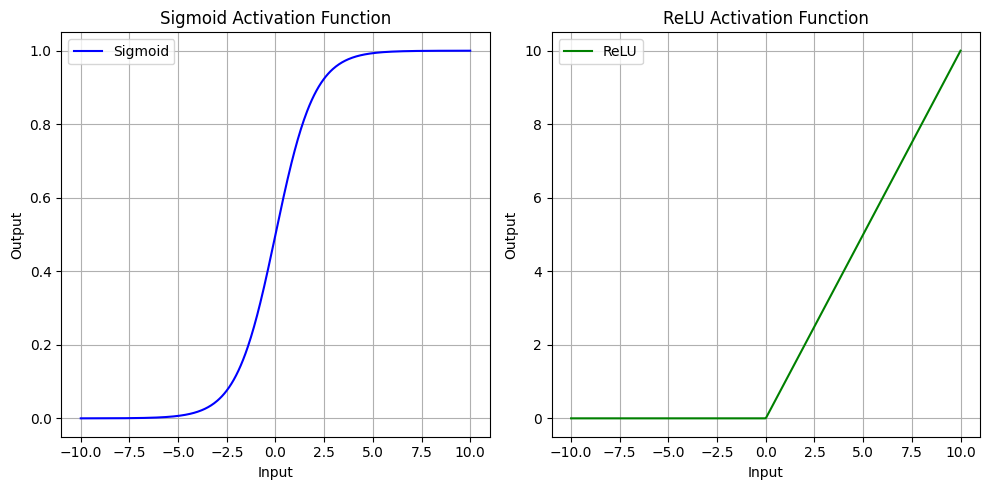

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Create input range
x = np.linspace(-10, 10, 500)

# Compute activation outputs
sigmoid_y = sigmoid(x)
relu_y = relu(x)

# Plot the activation functions
plt.figure(figsize=(10, 5))

# Sigmoid function
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_y, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()

# ReLU function
plt.subplot(1, 2, 2)
plt.plot(x, relu_y, label="ReLU", color="green")
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### Predictions

This section implements **predictions**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [11]:
# Predictions
predictions = [model.predict(x) for x in inputs]
print("\nNeural Network Predictions:")
for i, pred in enumerate(predictions):
    print(f"Inputs: {inputs[i]} -> Prediction: {pred[0]:.4f} -> Rounded: {round(pred[0])}")


Neural Network Predictions:
Inputs: [0, 0] -> Prediction: 0.0604 -> Rounded: 0
Inputs: [0, 1] -> Prediction: 0.9271 -> Rounded: 1
Inputs: [1, 0] -> Prediction: 0.9483 -> Rounded: 1
Inputs: [1, 1] -> Prediction: 0.0528 -> Rounded: 0


### Visualizing the Neural Network

This section implements **visualizing the neural network**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [12]:
## Visualizing the Neural Network
from matplotlib.patches import FancyArrow
import networkx as nx

### Build the Neural Network Graph

This section implements **build the neural network graph**. Here we describe how it contributes to the goal of the XOR AI demonstration.

In [13]:
# Build the Neural Network Graph
def visualize_nn(weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    G = nx.DiGraph()

    # Add Nodes
    G.add_nodes_from(["Input 1", "Input 2"], layer=0)
    G.add_nodes_from(["Hidden 1", "Hidden 2"], layer=1)
    G.add_nodes_from(["Output"], layer=2)

    # Add Edges with Weights
    for i, inp in enumerate(["Input 1", "Input 2"]):
        for h, hid in enumerate(["Hidden 1", "Hidden 2"]):
            G.add_edge(inp, hid, weight=weights_input_hidden[i, h])
    for h, hid in enumerate(["Hidden 1", "Hidden 2"]):
        G.add_edge(hid, "Output", weight=weights_hidden_output[h, 0])

    pos = nx.multipartite_layout(G, subset_key="layer")
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", edge_color="gray")
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Visualized Neural Network for XOR")
    plt.show()

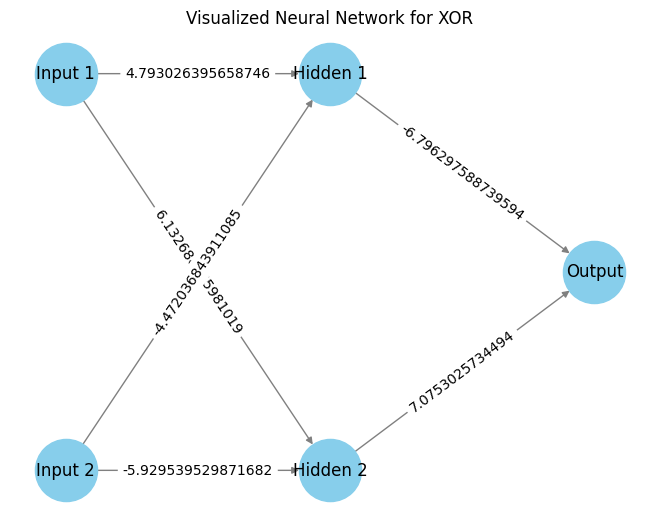

In [14]:
visualize_nn(model.weights_input_hidden, model.weights_hidden_output, model.bias_hidden, model.bias_output)

This is the visualization of the neural network plottet manually and marked

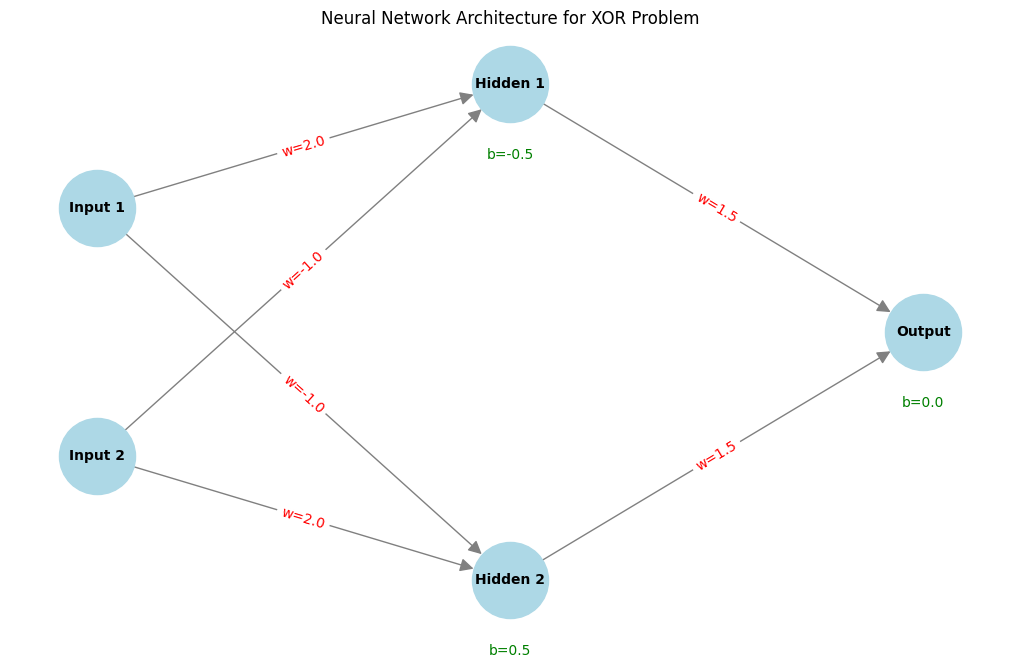

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the XOR neural network structure
G = nx.DiGraph()

# Input layer nodes
G.add_node("Input 1", pos=(0, 2), layer='Input')
G.add_node("Input 2", pos=(0, 1), layer='Input')

# Hidden layer nodes
G.add_node("Hidden 1", pos=(1, 2.5), layer='Hidden')
G.add_node("Hidden 2", pos=(1, 0.5), layer='Hidden')

# Output layer nodes
G.add_node("Output", pos=(2, 1.5), layer='Output')

# Edges (connections)
edges = [
    ("Input 1", "Hidden 1"), ("Input 1", "Hidden 2"),
    ("Input 2", "Hidden 1"), ("Input 2", "Hidden 2"),
    ("Hidden 1", "Output"), ("Hidden 2", "Output")
]

G.add_edges_from(edges)

# Extract positions for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, with_labels=True, node_size=3000,
    node_color='lightblue', font_size=10, font_weight='bold',
    arrowsize=20, edge_color='gray'
)

# Annotate weights and biases (example values after training)
weights_and_biases = {
    ("Input 1", "Hidden 1"): 2.0, ("Input 1", "Hidden 2"): -1.0,
    ("Input 2", "Hidden 1"): -1.0, ("Input 2", "Hidden 2"): 2.0,
    ("Hidden 1", "Output"): 1.5, ("Hidden 2", "Output"): 1.5
}
biases = {
    "Hidden 1": -0.5,
    "Hidden 2": 0.5,
    "Output": 0.0
}

# Draw edge labels
edge_labels = {(u, v): f'w={w}' for (u, v), w in weights_and_biases.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Draw node annotations for biases
for node, (x, y) in pos.items():
    if node in biases:
        plt.text(x, y-0.3, f'b={biases[node]}', fontsize=10, color='green', ha='center')

plt.title("Neural Network Architecture for XOR Problem")
plt.axis('off')
plt.show()


# Summary

- **Traditional Algorithms**:
  - Use explicit, predefined rules created by human programmers to solve specific problems.
  - They work well for structured, predictable tasks but struggle with unstructured or highly complex data.

- **Neural Networks**:
  - Instead of relying on explicit rules, neural networks learn patterns from data.
  - They generalize these patterns to solve diverse and complex tasks, including problems that are non-linearly separable, such as the XOR problem.

- **Algorithmic vs. Learning-Based Approach**:
  - Algorithms excel at deterministic tasks where all scenarios can be explicitly coded.
  - Neural networks thrive in environments where data relationships are intricate or unknown, allowing the model to "discover" the rules through training.

- **Neural Network Design Principles**:
  - **Problem Complexity**: Start with a simple architecture and increase complexity as needed.
  - **Non-Linearity**: Use activation functions in hidden layers to capture complex relationships.
  - **Overfitting**: Avoid overly complex models, especially for small datasets, to ensure generalization.
  - **Iterative Tuning**: Experiment with different configurations and evaluate using validation data to find an optimal balance.

- **Key Insights from the XOR Problem**:
  - The XOR problem illustrates why traditional linear models fail and the necessity of non-linear functions.
  - A small, well-designed neural network with one hidden layer and non-linear activations can solve the problem effectively.

- **Broader Implications**:
  - Neural networks represent a shift in problem-solving, moving from rule-based systems to adaptive systems that leverage data.
  - This approach is foundational to advancements in AI, enabling breakthroughs in image recognition, natural language processing, robotics, and more.

- **Final Thought**:
  - As you explore neural networks further, remember the balance between simplicity and complexity. Start small, understand the problem, and iteratively refine your models to achieve the best results.
